## 1.Importación de librerias requeridas

In [94]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1 Tratamiento de datos

### 1.1 Tratamiento de datos


In [95]:
base=pd.read_csv('\Data_Taller_1.csv',sep=";")

In [96]:
base.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160.0,False,2000.0,77.0,0.751,0.834,1.0,-5.444,0.0,0.0437,0.3000,1.77e-05,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066.0,False,1999.0,79.0,0.434,0.897,0.0,-4.918,1.0,0.0488,0.0103,0.0,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546.0,False,1999.0,66.0,0.529,0.496,7.0,-9.007,1.0,0.0290,0.1730,0.0,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493.0,False,2000.0,78.0,0.551,0.913,0.0,-4.063,0.0,0.0466,0.0263,1.35e-05,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560.0,False,2000.0,NaN,0.614,0.928,8.0,-4.806,0.0,0.0516,0.0408,0.00104,0.0845,0.879,172.656,pop


In [97]:
base.shape

(2000, 18)

In [98]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       1997 non-null   float64
 3   explicit          1998 non-null   object 
 4   year              1999 non-null   float64
 5   popularity        1996 non-null   float64
 6   danceability      1996 non-null   float64
 7   energy            1999 non-null   float64
 8   key               1999 non-null   float64
 9   loudness          1998 non-null   float64
 10  mode              1999 non-null   float64
 11  speechiness       1998 non-null   float64
 12  acousticness      1996 non-null   float64
 13  instrumentalness  1998 non-null   object 
 14  liveness          1999 non-null   float64
 15  valence           1998 non-null   float64
 16  tempo             1997 non-null   float64


Se identifican 10 registros con valores nulos en la base. Y se procede a elimiarlos para poder completar de manera exitosa el análisis de la información

In [99]:
base=base.dropna()

In [100]:
base.shape

(1980, 18)

In [101]:
base.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo
count,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000
mean,228771.948990,2009.483838,59.926768,0.667285,0.719965,5.374242,-5.511686,0.555051,0.103744,0.128911,0.181366,0.550703,120.098258
std,39276.277503,5.851734,21.279112,0.140879,0.152604,3.619447,1.933465,0.497086,0.096181,0.173023,0.140880,0.220872,26.989448
min,113000.000000,1998.000000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.023400,0.038100,60.019000
25%,203506.000000,2004.000000,56.000000,0.580000,0.622000,2.000000,-6.487250,0.000000,0.039600,0.013925,0.088350,0.386000,98.896500
50%,223279.500000,2010.000000,66.000000,0.676500,0.736000,6.000000,-5.286500,1.000000,0.060150,0.055800,0.124000,0.556500,120.017500
75%,248149.750000,2015.000000,73.000000,0.765000,0.838000,8.000000,-4.168000,1.000000,0.130000,0.176250,0.240000,0.728250,134.585000
max,484146.000000,2020.000000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.853000,0.973000,210.851000


### 1.2 El top 10 de los artistas más activos desde los últimos 10 años. 

In [102]:
base.groupby(["artist"]).agg({'popularity':'sum'})[['popularity']].sort_values(by='popularity', ascending=False).head(10).reset_index()


,artist,popularity
0,Rihanna,1803.0
1,Eminem,1519.0
2,Drake,1424.0
3,Calvin Harris,1335.0
4,Britney Spears,1198.0
5,David Guetta,1185.0
6,Chris Brown,1080.0
7,Kanye West,1049.0
8,Taylor Swift,1048.0
9,Katy Perry,1033.0


### 1.3 Creación del campo genero

Se usó como criterio para esta clasificación el género principal que tenga la categoría. Por ejemplo,  el género hip hop, pop se clasificará como hip hop.

In [103]:
conditions = [
    (base['genre'].str.startswith('rock,')) ,
    (base['genre'].str.startswith('pop',))  ,
    (base['genre'].str.startswith('metal,')),
    (base['genre'].str.startswith('hip hop,')), 
    (base['genre']==('rock')) ,
    (base['genre']==('pop'))  ,
    (base['genre']==('metal')),
    (base['genre']==('hip hop')), 
    (base['genre']=='latin'),
    (base['genre']=='R&B'),
    (base['genre']=='country'),
    (base['genre']=='Dance/Electronic')    
]
choices = ["rock","pop","metal","hip hop","rock","pop","metal","hip hop","latin","R&B","country","Dance/Electronic"]
base['genre2']=np.select(conditions, choices, default='others')

<AxesSubplot:xlabel='count', ylabel='genre2'>

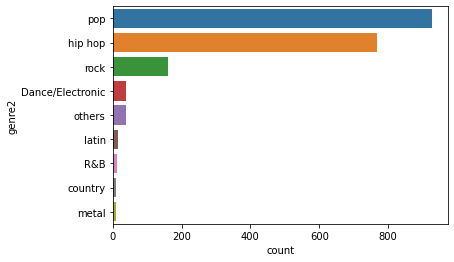

In [104]:
sns.countplot(y='genre2',data=base,order = base['genre2'].value_counts().index)


### 2. Diferencias entre el Folk/Acustic y Latin

In [105]:
base['duration_ms'].loc[base['genre'].str.contains('latin')].mean()/1000-base['duration_ms'].loc[base['genre'].str.contains('Folk/Acoustic')].mean()/1000

6.600737096774196

La diferencia del tiempo promedio en segundos de la duración de las canciones  entre los generos de Folk/Acustic y Latin, muestra que en promedio las canciones de latin tienen 6 segundos mas de duración que las canciones de Folk/Acustic.

### 3.Cantidad de canciones por género

In [106]:
top19=base[base['year'].isin([2019])].groupby(["year","genre2"]).agg({'song':'count'})[['song']].sort_values(by='song', ascending=False).head(5).reset_index()
top00=base[base['year'].isin([2000])].groupby(["year","genre2"]).agg({'song':'count'})[['song']].sort_values(by='song', ascending=False).head(5).reset_index()
top05=base[base['year'].isin([2005])].groupby(["year","genre2"]).agg({'song':'count'})[['song']].sort_values(by='song', ascending=False).head(5).reset_index()
top10=base[base['year'].isin([2010])].groupby(["year","genre2"]).agg({'song':'count'})[['song']].sort_values(by='song', ascending=False).head(5).reset_index()
top15=base[base['year'].isin([2015])].groupby(["year","genre2"]).agg({'song':'count'})[['song']].sort_values(by='song', ascending=False).head(5).reset_index()
top=pd.concat([top00, top05,top10,top15,top19], axis=0,sort=False)


El top 5 de 2019 es:

In [107]:
top19

,year,genre2,song
0,2019.0,pop,43
1,2019.0,hip hop,36
2,2019.0,latin,6
3,2019.0,Dance/Electronic,1
4,2019.0,others,1


sns.barplot(x='year',y='song',data=top,ci=None, hue='genre2').set_title("Top 5 de Generos")

Text(0.5, 1.0, 'Top 5 de géneros por año')

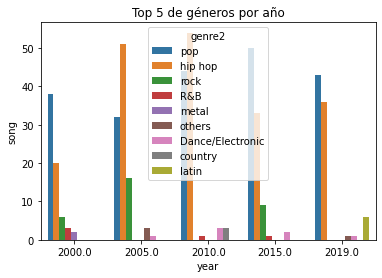

In [108]:
sns.barplot(x='year',y='song',data=top,ci=None, hue='genre2').set_title("Top 5 de géneros por año")

Se destaca el dominio de géneros como pop y el hip hop, mientras que generos como el metal han presentado una disminución en su producción comercial.

### Punto 4

Para medir la progresión de los nuevos artistas, es necesario definir el primer año de aparición. 

In [109]:
base['first_year'] = (base['year']).groupby(base['artist']).transform('min')

Posteriormente, se define como el desarrollo anual como la diferencia entre el año y el año de aparición

In [110]:
base['dev'] = base['year']-base['first_year']

Finalmente, se mide el progreso de los artistas nuevos desde el año 2010 como la popularidad promedio del artista en los años posteriores a su aparición

<AxesSubplot:xlabel='dev', ylabel='first_year'>

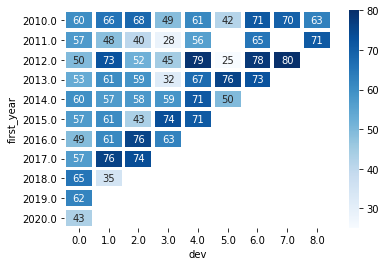

In [111]:
pvlikes = base[base['first_year']>=2010].pivot_table(values='popularity',index='first_year',columns='dev',aggfunc='mean')
sns.heatmap(pvlikes,annot=True, linewidths=3, linecolor='white',cmap='Blues')

Se observa un mayor crecimiento en los años 2012 y 2013, dado que en estos años los artistas presentan una mejor evolución de su popularidad.

## Punto 5

La popularidad por genero y año es la siguiente: 

<AxesSubplot:xlabel='year', ylabel='genre2'>

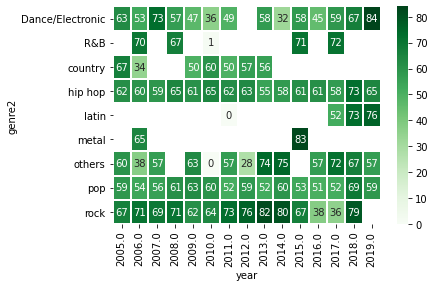

In [112]:
popgen = base[(base['year']>=2005) & (base['year']<=2019)].pivot_table(values='popularity',index='genre2',columns='year',aggfunc='mean')
sns.heatmap(popgen,annot=True, linewidths=1, linecolor='white',cmap='Greens')

## Punto 6

Para realizar la comparación entre los generos de Rock y pop de acuerdo al energy, valence, tempo, se considera en primer lugar los registros que contien información de estos generos. Clasificando los generos como: Pop, Rock y Pop-Rock.


In [113]:
conditions = [
    (base['genre'].str.contains('rock'))  & (base['genre'].str.contains('pop')) ,
    (base['genre'].str.contains('rock')==False)  & (base['genre'].str.contains('pop')) ,
    (base['genre'].str.contains('rock'))  & (base['genre'].str.contains('pop')==False) 
    
]
choices = ["pop-rock","pop","rock"]
base['genre3']=np.select(conditions, choices, default=base['genre'])


Una vez creada esta categoría se visualiza la información a cerca de las tres variables consideradas, de acuerdo al genero.

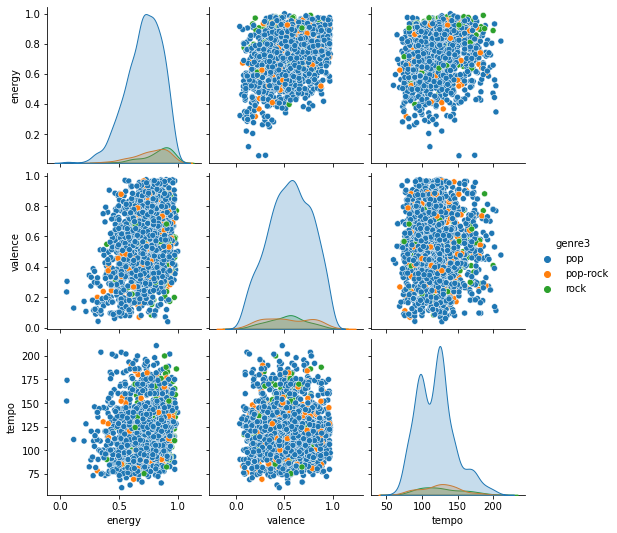

In [114]:
gen =['rock', 'pop-rock', 'pop']
gens = '|'.join(gen)
sns.pairplot(base[['genre3','energy', 'valence' , 'tempo']][base['genre3'].str.contains(gens, case=False)],hue='genre3')

El gráfico muestra la superioridad del Pop sobre el Rock en cuanto al tempo, la positividad musical y la energía.

### Punto 7

Los productores musicales de Hip Hop desean considerar cuanto tiempo toma la consolidación, en terminos de popularidad cuanto tiempo toma la consolidación de un artista en el género. Para tal estimación han considerado la popularidad promedio desde su lanzamiento.

In [133]:
data=base[(base['genre2']=='hip hop')].groupby('dev').agg({'popularity':'mean'})['popularity'].reset_index()

<AxesSubplot:xlabel='dev', ylabel='popularity'>

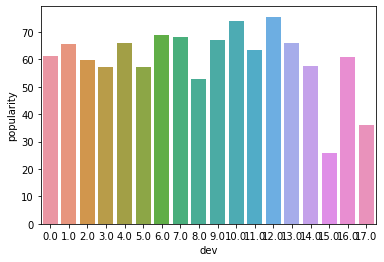

In [134]:
sns.barplot(data=data, x="dev", y="popularity")

El promedio toma alrededor de 6 a 7 años el alcanzar los niveles altos de popularidad, despues de los cuales suele mantenerse en niveles altos, lo cual se considera que el artista está consolidado.